In [4]:
import pandas as pd
import numpy as np
import pyfolio as pf

In [6]:
ohlc = np.load('dow_ohlc.npy', allow_pickle='TRUE').item()
ohlc['MMM']

,Open,High,Low,Close,Volume
Date,,,,,
2009-12-31,62.906018,63.123738,61.967570,62.065166,2049800
2010-01-04,62.380479,62.650753,62.065162,62.327927,3043700
2010-01-05,62.162779,62.485606,61.336941,61.937550,2847000
2010-01-06,62.973588,63.514135,62.695811,62.815929,5268500
2010-01-07,62.553137,62.883472,61.652230,62.860950,4470100
...,...,...,...,...,...
2020-09-23,162.520004,164.240005,159.119995,159.509995,2248200
2020-09-24,159.399994,161.960007,158.070007,160.419998,1569700
2020-09-25,159.309998,160.979996,158.860001,160.270004,1948900


In [8]:
# List of DJIA stocks
dow_stocks = ['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 
              'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 
              'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIS']

In [10]:
# Function to calculate average true range
def ATR(df, n):
    
    df = df.copy()

    df['H-L'] = abs(df['High'] - df['Low'])
    df['H-PC'] = abs(df['High'] - df['Close'].shift(1))
    df['L-PC'] = abs(df['Low'] - df['Close'].shift(1))

    df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis=1, skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()

    df2 = df.drop(['H-L', 'H-PC', 'L-PC'], axis=1)

    return df2['ATR']
    

In [11]:
for symbol in dow_stocks:
    ohlc[symbol]['ATR'] = ATR(ohlc[symbol], 21)

In [12]:
df = pd.DataFrame({symbol: ohlc[symbol]['ATR'] for symbol in dow_stocks})

df

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-23,4.215238,3.010477,7.299524,5.832500,7.119525,4.541904,2.312381,0.783723,1.113274,1.585037,...,3.304788,2.268573,13.721430,3.102683,8.004656,0.884762,4.994763,1.110477,4.230002,3.483334
2020-09-24,4.265714,3.030953,6.847619,5.948929,7.022858,4.557143,2.324286,0.791273,1.167713,1.591275,...,3.450151,2.272858,13.551906,3.202329,8.040308,0.900952,5.084287,1.099524,4.280477,3.542382
2020-09-25,4.220000,3.081429,6.883333,6.072857,7.350477,4.607619,2.335715,0.795519,1.171317,1.563700,...,3.530235,2.321906,11.027144,3.210731,8.205798,0.902857,5.138096,1.094286,4.299523,3.548572


In [14]:
df.isnull().sum()

MMM       22
AXP       22
AMGN      22
AAPL      22
BA        22
CAT       43
CVX       22
CSCO      22
KO        22
DOW     2340
GS        22
HD        22
HON       22
IBM       22
INTC      22
JNJ       22
JPM       22
MCD       22
MRK       22
MSFT      22
NKE       22
PG        22
CRM       22
TRV       22
UNH       22
VZ        22
V         22
WBA       22
WMT       22
DIS       22
dtype: int64

In [16]:
# Fill forward the missing values and drop DOW company from the list
df.fillna(method='bfill', axis=0, inplace=True)
df.drop(['DOW'], axis=1, inplace=True)

/var/folders/7q/6sr3f8p154zcxjkx38dw3tfc0000gn/T/ipykernel_32543/982613102.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', axis=0, inplace=True)


In [17]:
# Resample to a weekly timeframe for cluster analysis
px = df.resample('W-FRI').mean()
px = px.T

px

Date,2010-01-01,2010-01-08,2010-01-15,2010-01-22,2010-01-29,2010-02-05,2010-02-12,2010-02-19,2010-02-26,2010-03-05,...,2020-07-31,2020-08-07,2020-08-14,2020-08-21,2020-08-28,2020-09-04,2020-09-11,2020-09-18,2020-09-25,2020-10-02
MMM,1.113625,1.113625,1.113625,1.113625,1.113625,1.153880,1.233820,1.308653,1.232967,1.071002,...,3.304308,3.337810,3.339979,3.176965,2.863492,2.869821,3.166674,3.413893,4.169714,4.322380
AXP,1.035185,1.035185,1.035185,1.035185,1.035185,1.046649,1.079262,1.101860,0.908801,0.774188,...,2.843043,2.639048,2.661429,2.715334,2.638858,2.682953,2.666072,2.634953,3.009524,3.067619
AMGN,0.944033,0.944033,0.944033,0.944033,0.944033,0.935090,0.901456,0.842463,0.764781,0.697285,...,6.991551,5.912776,5.513730,5.206030,5.178612,5.526902,6.276775,6.502001,7.032953,6.745236
AAPL,0.189773,0.189773,0.189773,0.189773,0.189773,0.194869,0.202438,0.196099,0.168340,0.132842,...,2.461490,3.033089,3.262488,3.310282,3.489328,3.854957,5.046608,5.506762,5.922024,6.040714
BA,1.420966,1.420966,1.420966,1.420966,1.420966,1.395097,1.348466,1.392967,1.330655,1.184213,...,8.306858,7.601714,7.459999,7.183617,7.058093,6.733713,6.922977,6.694763,7.148001,7.457144
CAT,1.533670,1.533670,1.533670,1.533670,1.533670,1.520942,1.573473,1.557398,1.375859,1.202488,...,3.214466,3.226924,3.256621,3.086761,3.204095,3.154476,3.518809,3.867809,4.522095,4.661904
CVX,0.948067,0.948067,0.948067,0.948067,0.948067,0.954870,1.043509,1.090255,1.021200,0.923124,...,2.715329,2.679841,2.612996,2.404789,2.250110,1.998820,2.083493,2.094879,2.283048,2.434763
CSCO,0.455210,0.455210,0.455210,0.455210,0.455210,0.451763,0.459877,0.427567,0.373286,0.320226,...,0.946124,0.948584,1.014642,1.103441,0.996145,0.926313,0.959130,0.707852,0.772871,0.819819
KO,0.292113,0.292113,0.292113,0.292113,0.292113,0.299016,0.322607,0.325995,0.317540,0.330460,...,0.943505,0.967596,0.901276,0.806897,0.759754,0.817288,0.953826,0.979944,1.113322,1.164498
GS,4.401394,4.401394,4.401394,4.401394,4.401394,4.418970,4.474883,4.346649,3.533104,3.016992,...,6.037351,5.294707,4.534830,4.198391,4.267118,4.513423,5.035561,4.921476,5.582563,5.937155


In [22]:
from kneed import KneeLocator
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
scaled_px = scaler.fit_transform(px)

In [47]:
# Get the inertia
sse = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_px)
    sse.append(kmeans.inertia_)

kl = KneeLocator(range(1, 30), sse, curve='convex', direction='decreasing')
knee_pt = kl.elbow
knee_pt

6

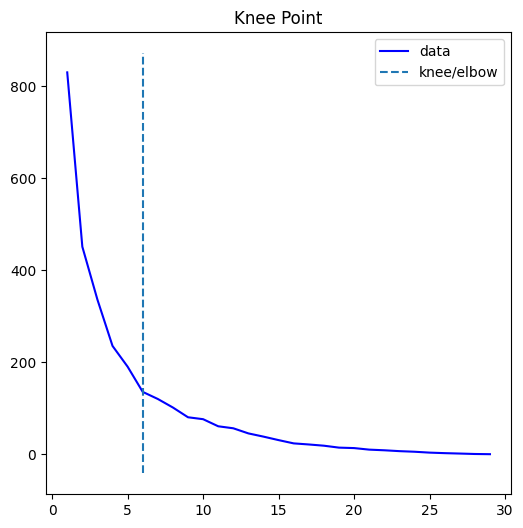

In [48]:
kl.plot_knee()

In [49]:
# Build clusters
model = KMeans(n_clusters=knee_pt)
model.fit(scaled_px)

labels = model.predict(scaled_px)
labels

array([2, 2, 5, 1, 4, 0, 2, 1, 1, 3, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 4, 1, 2, 2, 1, 2], dtype=int32)

In [50]:
# Remove DOW from the list
companies = dow_stocks
companies.remove('DOW')

In [51]:
df1 = pd.DataFrame({'Cluster': labels,
                    'Companies': companies,
                    'ATR': px.mean(axis=1),
                   }).sort_values(by=['Cluster'], axis=0)

df1 = df1.reset_index(drop=True)
df1

,Cluster,Companies,ATR
0,0,IBM,2.095919
1,0,CAT,2.079966
2,1,KO,0.493262
3,1,WMT,1.116245
4,1,INTC,0.695828
5,1,NKE,0.969232
6,1,PG,1.030430
7,1,MSFT,1.290491
8,1,MRK,0.865679
9,1,VZ,0.606684


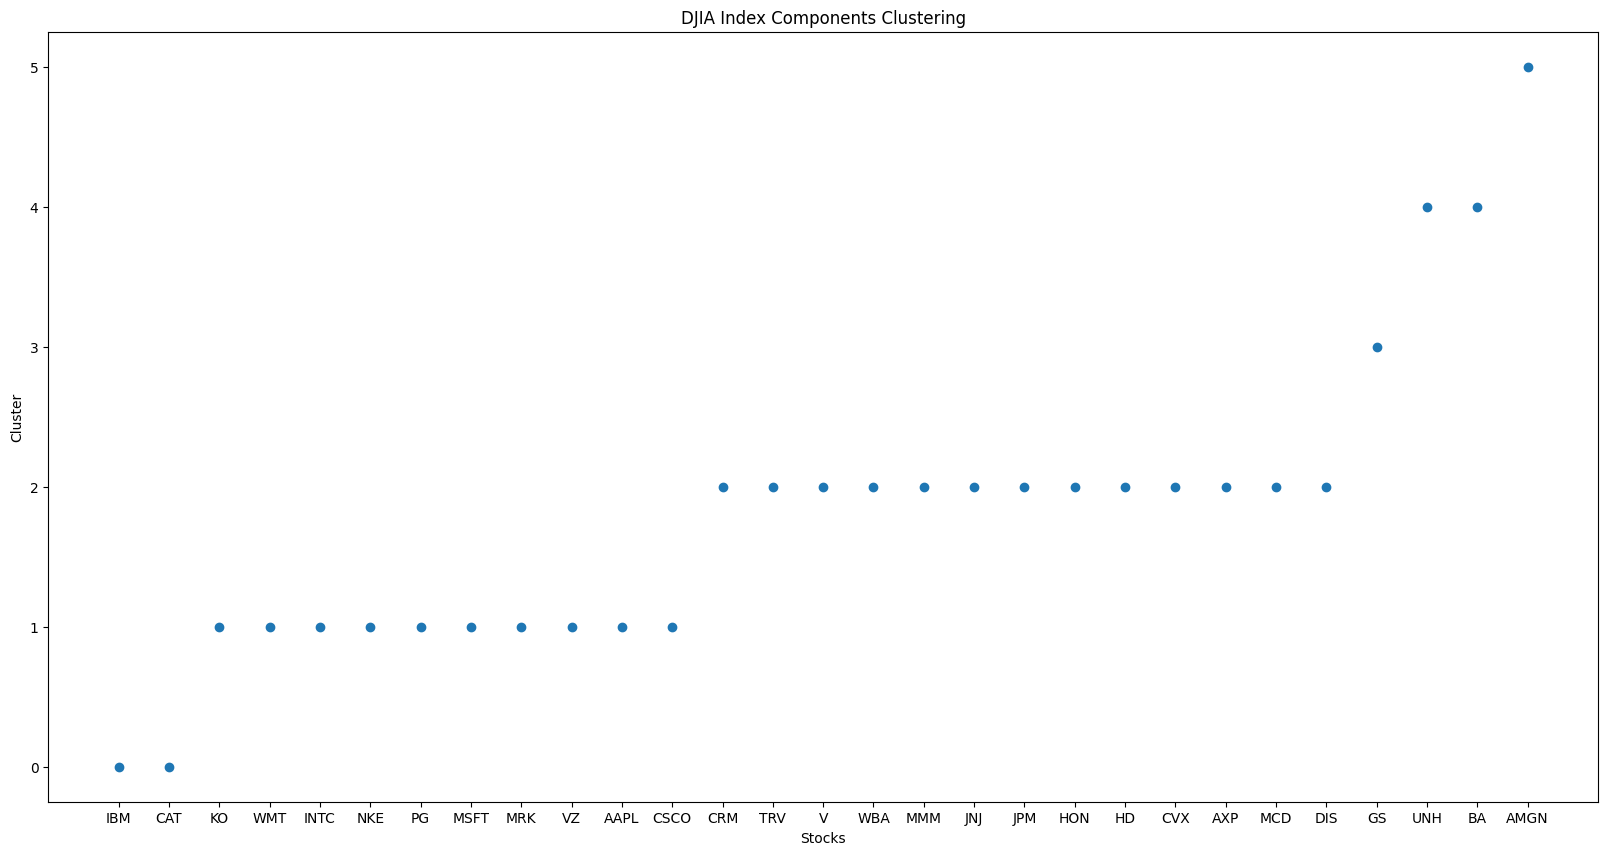

In [52]:
plt.figure(figsize=(20,10))
plt.scatter(df1.Companies, df1.Cluster)
plt.xlabel('Stocks')
plt.ylabel('Cluster')
plt.title('DJIA Index Components Clustering');

In [53]:
# Shortlisting the six stocks from the above clusters (one for each)

portfolio_stocks = ['IBM', 'NKE', 'DIS', 'GS', 'BA', 'AMGN']
port = pd.DataFrame({symbol: ohlc[symbol]['Close'] for symbol in portfolio_stocks})
port.dropna(inplace=True)
port

,IBM,NKE,DIS,GS,BA,AMGN
Date,,,,,,
2009-12-31,92.406113,12.066024,28.090706,144.296997,41.856789,45.404182
2010-01-04,93.500313,11.934528,27.933924,147.920776,43.441975,46.327202
2010-01-05,92.370834,11.982012,27.864237,150.535919,44.864773,45.925884
2010-01-06,91.770790,11.908962,27.716166,148.929138,46.225727,45.580757
2010-01-07,91.453102,12.025843,27.724878,151.843475,48.097031,45.163395
...,...,...,...,...,...,...
2020-09-23,118.830002,127.110001,123.279999,186.119995,151.179993,242.589996
2020-09-24,118.089996,124.750000,122.489998,195.110001,146.050003,240.320007
2020-09-25,118.949997,124.230003,124.000000,194.949997,156.029999,243.820007


In [54]:
# Calculate portfolio returns
portfolio_returns = port.pct_change().fillna(0)
port['Returns'] = portfolio_returns.mean(axis=1)
port

,IBM,NKE,DIS,GS,BA,AMGN,Returns
Date,,,,,,,
2009-12-31,92.406113,12.066024,28.090706,144.296997,41.856789,45.404182,0.000000
2010-01-04,93.500313,11.934528,27.933924,147.920776,43.441975,46.327202,0.013113
2010-01-05,92.370834,11.982012,27.864237,150.535919,44.864773,45.925884,0.005195
2010-01-06,91.770790,11.908962,27.716166,148.929138,46.225727,45.580757,-0.000960
2010-01-07,91.453102,12.025843,27.724878,151.843475,48.097031,45.163395,0.009594
...,...,...,...,...,...,...,...
2020-09-23,118.830002,127.110001,123.279999,186.119995,151.179993,242.589996,-0.006933
2020-09-24,118.089996,124.750000,122.489998,195.110001,146.050003,240.320007,-0.004365
2020-09-25,118.949997,124.230003,124.000000,194.949997,156.029999,243.820007,0.016253


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14.235%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2009-12-31
End date,2020-09-29
Total months,128
,Backtest
Annual return,14.235%
Cumulative returns,317.267%
Annual volatility,20.105%
Sharpe ratio,0.76
Calmar ratio,0.33
Stability,0.95
Max drawdown,-42.793%


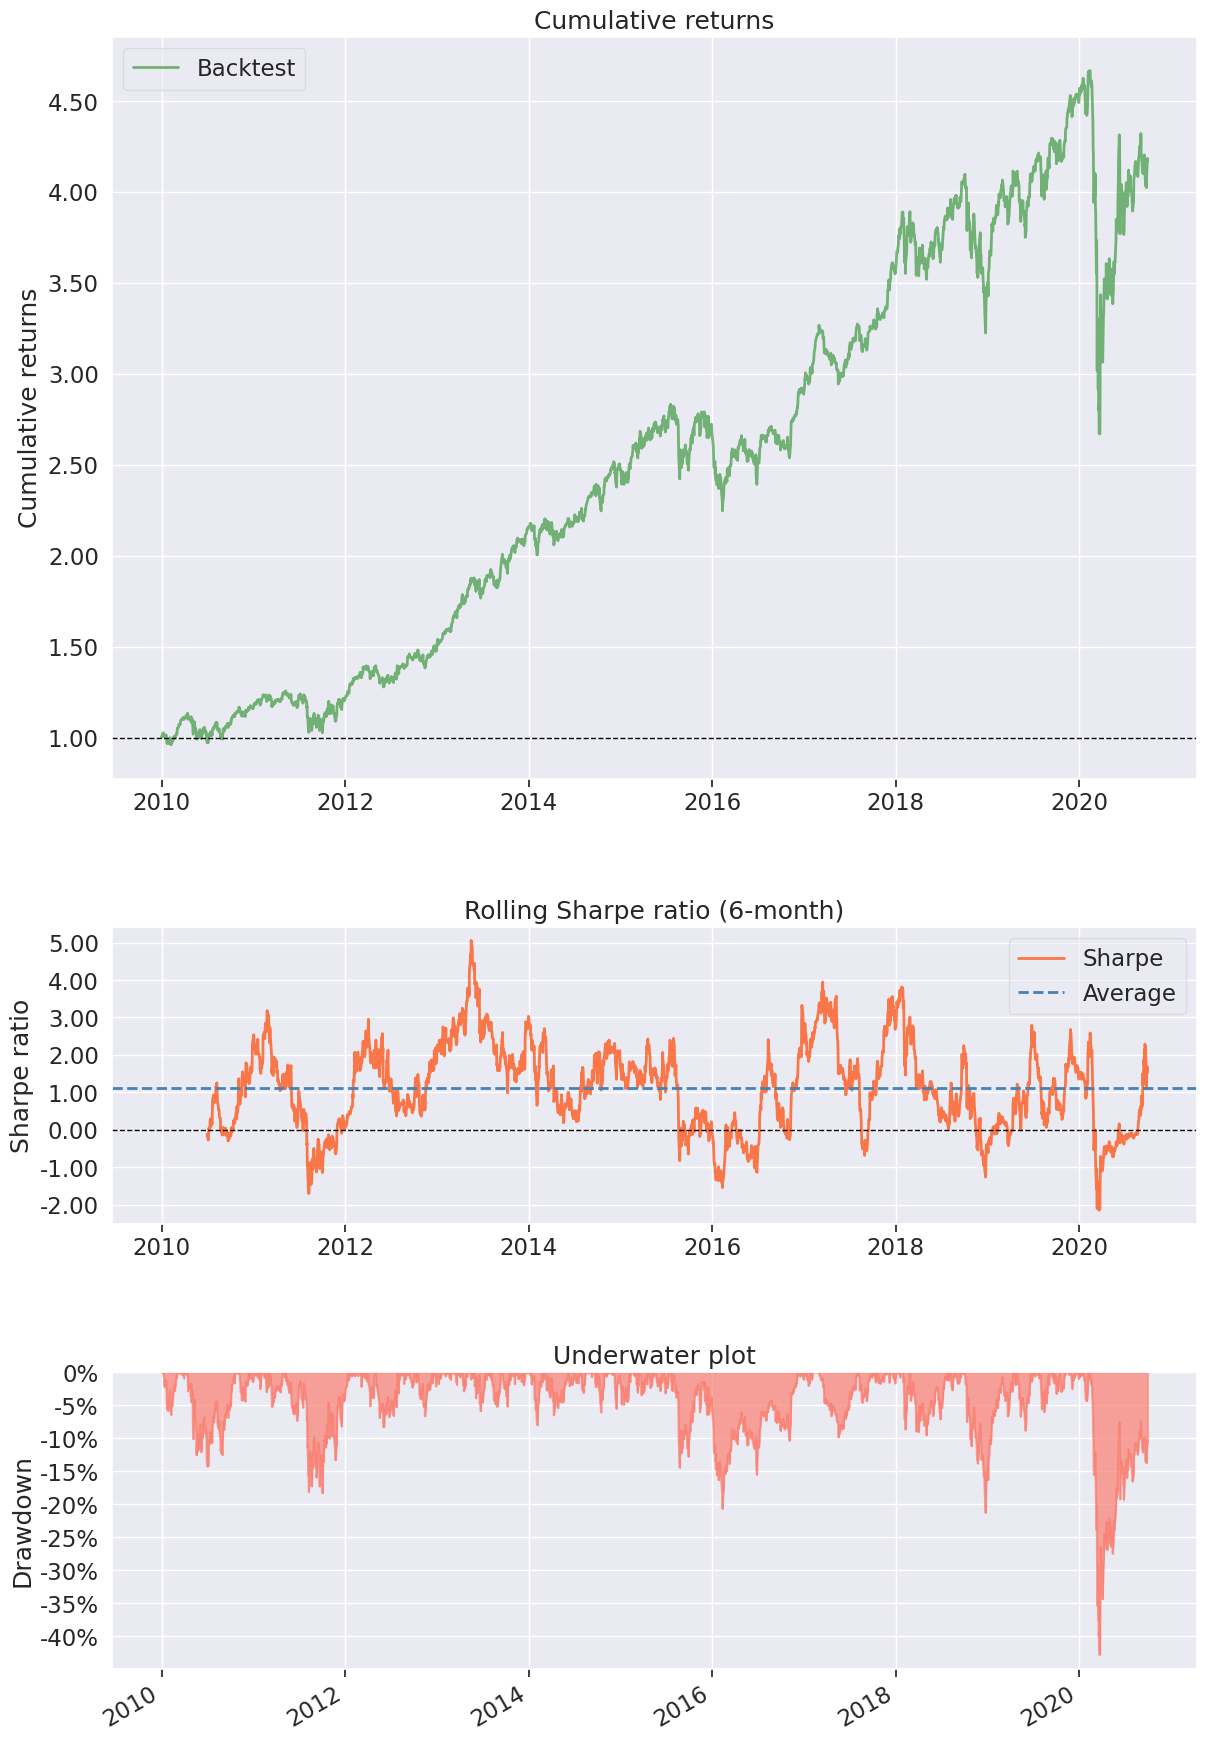

In [55]:
pf.create_simple_tear_sheet(port['Returns'])

In [56]:
all_stocks = pd.DataFrame({symbol: ohlc[symbol]['Close'] for symbol in companies})
all_stocks.dropna(inplace=True)
all_stocks

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,GS,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,62.065166,34.434761,45.404182,6.503574,41.856789,41.498463,50.924435,18.048286,18.951757,144.296997,...,12.066024,43.431492,18.442499,38.205708,25.778193,18.633041,17.935587,28.350834,40.954620,28.090706
2010-01-04,62.327927,34.774685,46.327202,6.604801,43.441975,42.634403,52.293617,18.613705,18.965061,147.920776,...,11.934528,43.782478,18.705000,38.167397,26.666224,18.717409,18.075037,28.798639,41.552284,27.933924
2010-01-05,61.937550,34.698196,45.925884,6.616219,44.864773,43.144135,52.664024,18.530785,18.735643,150.535919,...,11.982012,43.796806,18.625000,37.263195,26.623932,18.751152,17.867916,28.567017,41.138515,27.864237
2010-01-06,62.815929,35.259079,45.580757,6.510980,46.225727,43.275200,52.670624,18.410154,18.728989,148.929138,...,11.908962,43.589062,18.592501,36.734470,26.886124,18.229431,17.627977,28.350834,41.046570,27.716166
2010-01-07,62.860950,35.830952,45.163395,6.498945,48.097031,43.449959,52.472206,18.493084,18.682440,151.843475,...,12.025843,43.352684,18.510000,37.263195,27.917923,18.120922,17.792036,28.520689,41.069557,27.724878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-23,159.509995,95.559998,242.589996,107.120003,151.179993,144.380005,71.949997,37.930145,48.209999,186.119995,...,127.110001,136.309998,235.990005,107.489998,292.140015,58.910000,195.369995,35.060001,135.990005,123.279999
2020-09-24,160.419998,95.449997,240.320007,108.220001,146.050003,145.139999,71.800003,37.504074,48.700001,195.110001,...,124.750000,136.919998,237.550003,107.820000,292.660004,59.189999,195.520004,35.029999,136.699997,122.489998
2020-09-25,160.270004,96.260002,243.820007,112.279999,156.029999,145.910004,71.830002,38.098591,48.720001,194.949997,...,124.230003,137.619995,242.740005,108.110001,302.500000,59.389999,197.250000,35.430000,137.270004,124.000000


In [57]:
all_stocks_returns = all_stocks.pct_change().fillna(0)
all_stocks['Returns'] = all_stocks_returns.mean(axis=1)
all_stocks

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,GS,...,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS,Returns
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,62.065166,34.434761,45.404182,6.503574,41.856789,41.498463,50.924435,18.048286,18.951757,144.296997,...,43.431492,18.442499,38.205708,25.778193,18.633041,17.935587,28.350834,40.954620,28.090706,0.000000
2010-01-04,62.327927,34.774685,46.327202,6.604801,43.441975,42.634403,52.293617,18.613705,18.965061,147.920776,...,43.782478,18.705000,38.167397,26.666224,18.717409,18.075037,28.798639,41.552284,27.933924,0.013946
2010-01-05,61.937550,34.698196,45.925884,6.616219,44.864773,43.144135,52.664024,18.530785,18.735643,150.535919,...,43.796806,18.625000,37.263195,26.623932,18.751152,17.867916,28.567017,41.138515,27.864237,-0.000573
2010-01-06,62.815929,35.259079,45.580757,6.510980,46.225727,43.275200,52.670624,18.410154,18.728989,148.929138,...,43.589062,18.592501,36.734470,26.886124,18.229431,17.627977,28.350834,41.046570,27.716166,-0.001946
2010-01-07,62.860950,35.830952,45.163395,6.498945,48.097031,43.449959,52.472206,18.493084,18.682440,151.843475,...,43.352684,18.510000,37.263195,27.917923,18.120922,17.792036,28.520689,41.069557,27.724878,0.005532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-23,159.509995,95.559998,242.589996,107.120003,151.179993,144.380005,71.949997,37.930145,48.209999,186.119995,...,136.309998,235.990005,107.489998,292.140015,58.910000,195.369995,35.060001,135.990005,123.279999,-0.018652
2020-09-24,160.419998,95.449997,240.320007,108.220001,146.050003,145.139999,71.800003,37.504074,48.700001,195.110001,...,136.919998,237.550003,107.820000,292.660004,59.189999,195.520004,35.029999,136.699997,122.489998,0.001568
2020-09-25,160.270004,96.260002,243.820007,112.279999,156.029999,145.910004,71.830002,38.098591,48.720001,194.949997,...,137.619995,242.740005,108.110001,302.500000,59.389999,197.250000,35.430000,137.270004,124.000000,0.011886


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15.868%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2009-12-31
End date,2020-09-29
Total months,128
,Backtest
Annual return,15.868%
Cumulative returns,385.945%
Annual volatility,17.197%
Sharpe ratio,0.94
Calmar ratio,0.48
Stability,0.98
Max drawdown,-33.086%


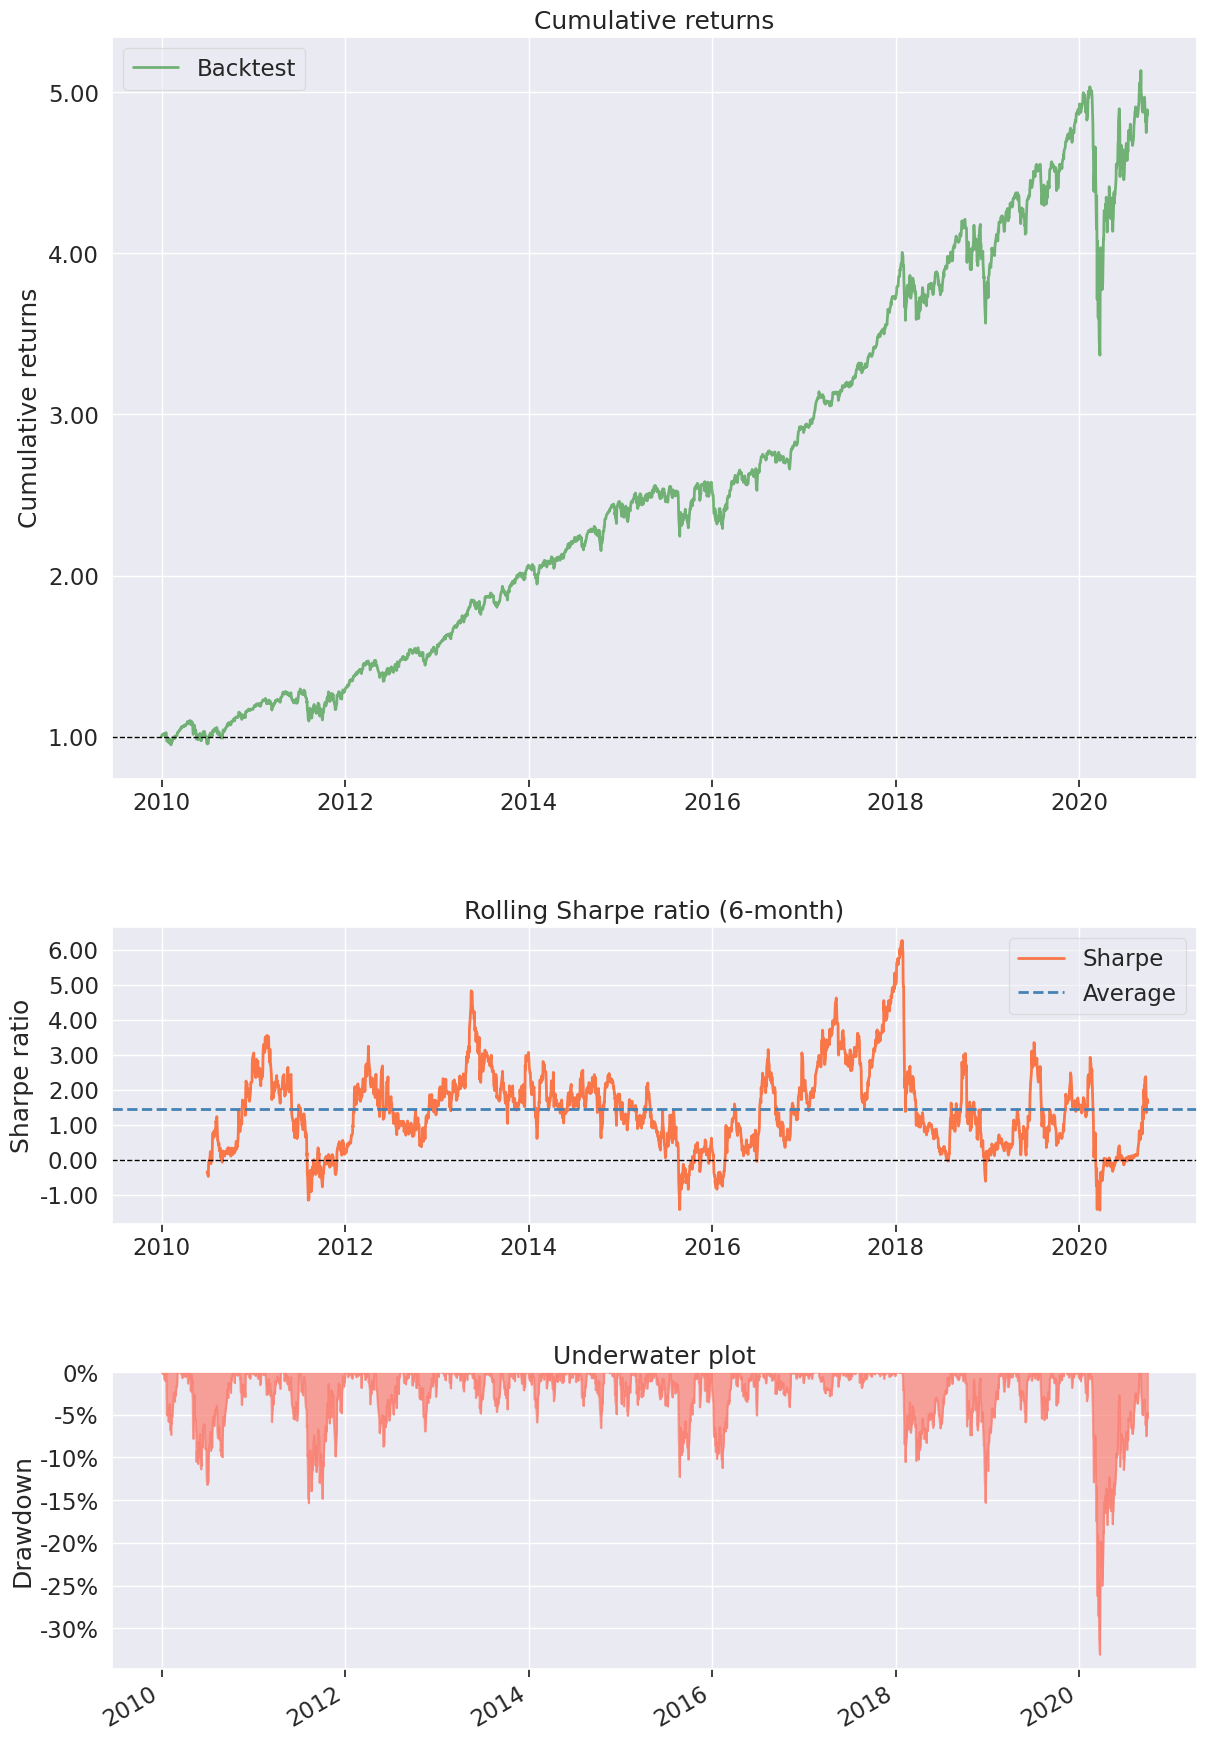

In [58]:
pf.create_simple_tear_sheet(all_stocks['Returns'])